In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df_train = pd.read_csv("/content/drive/MyDrive/Data Science/AnalyticsVidhya-JOBATHON/train_F3fUq2S.csv")
df_train

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,1884,3,88,1451,75,2,0,Noon,2,11,...,0,0,1,0,0,0,0,0,10,0.350746
1884,1885,3,58,10537,40,2,0,Evening,2,11,...,0,0,0,0,0,0,0,0,11,0.004728
1885,1886,3,89,11050,26,1,0,Evening,15,9,...,0,0,0,0,0,0,0,0,6,0.008289
1886,1887,3,58,10537,40,1,0,Evening,2,11,...,0,0,0,0,0,0,0,0,16,0.012014


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [ ]:
df_train.nunique()

campaign_id           1888
sender                  12
subject_len            170
body_len              1568
mean_paragraph_len     121
day_of_week              7
is_weekend               2
times_of_day             3
category                16
product                 43
no_of_CTA               40
mean_CTA_len            79
is_image                 6
is_personalised          2
is_quote                 7
is_timer                 1
is_emoticons             6
is_discount              2
is_price                 8
is_urgency               2
target_audience         17
click_rate            1810
dtype: int64

In [ ]:
df_train['sender'].value_counts()

3     1559
10     181
15      89
6       22
9       13
14       7
11       7
0        3
12       3
7        2
2        1
1        1
Name: sender, dtype: int64

In [ ]:
df_train.isnull().sum() 
#No null values are present in the dataset

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

In [3]:
#times_of_day	feature is categorical and we should encode it
day = pd.get_dummies(df_train['times_of_day'],drop_first=True)
df_train = pd.concat([df_train,day],axis=1)
df_train.drop('times_of_day',axis=1,inplace=True)
df_train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate,Morning,Noon
0,1,3,76,10439,39,5,1,6,26,3,...,0,0,0,0,0,0,14,0.103079,0,1
1,2,3,54,2570,256,5,1,2,11,0,...,0,0,0,0,0,0,10,0.700000,1,0
2,3,3,59,12801,16,5,1,2,11,3,...,1,0,0,0,0,0,16,0.002769,0,1
3,4,3,74,11037,30,4,0,15,9,4,...,0,0,0,0,0,0,10,0.010868,0,0
4,5,3,80,10011,27,5,1,6,26,3,...,1,0,0,0,0,0,14,0.142826,0,1


In [4]:
X = df_train.drop(['click_rate','campaign_id'],axis=1)
y = df_train['click_rate']

In [6]:
## Divide the train dataset into Train and Validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f}  \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), rf.score(X_val, y_val)))

R^2 Training Score: 0.94  
R^2 Validation Score: 0.44


In [8]:
# get importance
importance = rf.feature_importances_
importance = pd.Series(importance)
importance.index = X_train.columns
importance.sort_values(ascending=False)

body_len              0.253305
no_of_CTA             0.142444
mean_CTA_len          0.140784
mean_paragraph_len    0.124230
subject_len           0.082420
product               0.046046
category              0.045192
target_audience       0.034690
day_of_week           0.032602
is_image              0.028820
is_quote              0.020395
Noon                  0.017312
is_weekend            0.009516
Morning               0.006273
sender                0.006197
is_personalised       0.005976
is_emoticons          0.002722
is_urgency            0.001027
is_discount           0.000046
is_price              0.000003
is_timer              0.000000
dtype: float64

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
import time as time
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [9]:
XGBmodel = XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.03, max_depth=7, min_child_weight=4, n_estimators= 1500,subsample= 0.7,objective = 'reg:squarederror')


In [10]:
importance_sort = importance.sort_values(ascending=False)
score = []
for i in range(len(importance_sort)):
  X_train_ = X_train[importance_sort.index[:i+1]]
  X_val_ = X_val[importance_sort.index[:i+1]]
  XGBmodel.fit(X_train_,y_train)
  score.append(XGBmodel.score(X_val_,y_val))

In [11]:
k = np.argmax(score) + 1
k

12

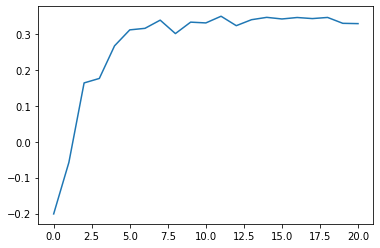

In [ ]:
plt.plot(score)

Taking the 12 most important features

In [12]:
Xtrain_fs =  X_train[importance_sort.index[:12]]
Xval_fs =  X_val[importance_sort.index[:12]]

GOING FOR GRIDSEARCH

In [ ]:
model_params = {
    'ADBoost': {
        'model': AdaBoostRegressor(),
        'params' : {
            'n_estimators':[50,75,100,125,150,175,200,500,1000]
        }
    },
    'KNN': {
        'model':KNeighborsRegressor(),
        'params':{
            'n_neighbors':[7,9,11,13,15],
            'weights':['uniform','distance']
        }
    },
    
    'Random Forest':{
        'model':RandomForestRegressor(),
        'params' : {
            'n_estimators':[50,75,100,125,150,175,200,500]
        }
    },

    'SVR': {
        'model':SVR(gamma="auto"),
        'params' : {
            'C':[1,10,20],
        }
    },
    'Xgboost':{
        'model':XGBRegressor(),
        'params' : {'nthread':[4], #when use hyperthread, xgboost may become slower
              'learning_rate': [0.01, 0.05,0.1,0.3], #so called `eta` value
              'objective':['reg:squarederror'],
              'max_depth': [7,8,9,10],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [250,500,1000,1500]}
    }
}

In [ ]:
cv_scores = []

for model_name, mp in model_params.items():
    start = time.time()
    print (model_name," started...")
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,scoring='r2')
    clf.fit(Xtrain_fs,y_train)
    cv_scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    print (model_name," completed...")
    
    
    end = time.time()
    duration = end - start
    if (duration>=3600):
        hours = duration//3600
        mins = (duration%3600)//60
        secs = duration%60
    elif (duration>=60):
        hours = 0
        mins= duration//60
        secs = duration%60
    else:
        hours = 0
        mins = 0
        secs = duration
    print (round(hours,2), " hr(s) ",round(mins,2)," min(s) ",round(secs,2), " sec(s)\n")

ADBoost  started...
ADBoost  completed...
0  hr(s)  0  min(s)  7.92  sec(s)

KNN  started...
KNN  completed...
0  hr(s)  0  min(s)  0.41  sec(s)

Random Forest  started...
Random Forest  completed...
0  hr(s)  0  min(s)  49.17  sec(s)

SVR  started...
SVR  completed...
0  hr(s)  0  min(s)  1.47  sec(s)

Xgboost  started...
Xgboost  completed...
0  hr(s)  9.0  min(s)  46.08  sec(s)



In [ ]:
results_df = pd.DataFrame(cv_scores,columns=['model','best_score','best_params'])
results_df.sort_values('best_score',ascending=False)

,model,best_score,best_params
4,Xgboost,0.562772,"{'colsample_bytree': 0.7, 'learning_rate': 0.0..."
2,Random Forest,0.502888,{'n_estimators': 100}
1,KNN,0.298285,"{'n_neighbors': 11, 'weights': 'distance'}"
0,ADBoost,0.000904,{'n_estimators': 200}
3,SVR,-0.831958,{'C': 1}


In [ ]:
print ("XG Boost Best params")
results_df.best_params[4]

XG Boost Best params


{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 10,
 'n_estimators': 1500,
 'nthread': 4,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

Training the two best models and evaluating their performances on validation set

In [16]:
model_random_forest = RandomForestRegressor(n_estimators=100)
model_random_forest.fit(Xtrain_fs,y_train)
model_xg_boost = XGBRegressor(colsample_bytree =0.7,learning_rate=0.01,max_depth= 10,
                           n_estimators = 1500, nthread = 4,objective ='reg:squarederror',subsample=0.7)
model_xg_boost.fit(Xtrain_fs,y_train)
print(f'RF VAL SCORE : {model_random_forest.score(Xval_fs,y_val)}')
print(f'XGBOOST VAL SCORE : {model_xg_boost.score(Xval_fs,y_val)}')

RF VAL SCORE : 0.41232250270595094
XGBOOST VAL SCORE : 0.38585142970938824


Random forest working best on validation data so we will train the model with RF on the entire test set

In [ ]:
model_random_forest.fit(X[importance_sort.index[:12]],y)

RandomForestRegressor()

TEST SET

In [13]:
df_test = pd.read_csv('/content/drive/MyDrive/Data Science/AnalyticsVidhya-JOBATHON/test_Bk2wfZ3.csv')
df_test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


In [14]:
#times_of_day	feature is categorical and we should encode it
day = pd.get_dummies(df_test['times_of_day'],drop_first=True)
df_test = pd.concat([df_test,day],axis=1)
df_test.drop('times_of_day',axis=1,inplace=True)
df_test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,Morning,Noon
0,1889,3,61,12871,11,6,1,6,26,3,...,0,0,0,1,0,0,0,14,0,1
1,1890,3,54,2569,256,5,1,2,11,0,...,0,0,0,0,0,0,0,10,1,0
2,1891,3,88,1473,78,4,0,2,11,0,...,0,1,0,0,0,0,0,10,0,0
3,1892,3,88,1473,78,3,0,2,11,0,...,0,1,0,0,0,0,0,10,0,0
4,1893,3,78,9020,29,3,0,6,26,2,...,0,0,0,0,0,0,0,14,0,1


In [18]:
campaign_id = df_test['campaign_id']
X_1 = df_test.drop('campaign_id',axis=1)
X_1 = X_1[importance_sort.index[:12]]
click_rate = model_random_forest.predict(X_1)

In [ ]:
sub_df5 = pd.DataFrame({'campaign_id': campaign_id,
                       'click_rate':click_rate},
                       columns=['campaign_id','click_rate'])
sub_df5

,campaign_id,click_rate
0,1889,0.054773
1,1890,0.558750
2,1891,0.189522
3,1892,0.205092
4,1893,0.137850
...,...,...
757,2646,0.015643
758,2647,0.012210
759,2648,0.022356
760,2649,0.259022


In [ ]:
sub_df5.to_csv('Submission-5.csv',index=False) #0.65...

Taking avg approach. using both XGBOOST and RF to pred

In [17]:
model_random_forest.fit(X[importance_sort.index[:12]],y)
model_xg_boost.fit(X[importance_sort.index[:12]],y)

XGBRegressor(colsample_bytree=0.7, learning_rate=0.01, max_depth=10,
             n_estimators=1500, nthread=4, objective='reg:squarederror',
             subsample=0.7)

In [ ]:
click_rate = model_random_forest.predict(X_1) + model_xg_boost.predict(X_1)
click_rate = click_rate/2

In [ ]:
sub_df7 = pd.DataFrame({'campaign_id': campaign_id,
                       'click_rate':click_rate},
                       columns=['campaign_id','click_rate'])
sub_df7

,campaign_id,click_rate
0,1889,0.057499
1,1890,0.611949
2,1891,0.170586
3,1892,0.171231
4,1893,0.150640
...,...,...
757,2646,0.013781
758,2647,0.010486
759,2648,0.015694
760,2649,0.271170


In [ ]:
sub_df7.to_csv('Submission-7.csv',index=False) #0.67

Giving more weightage to xgboost predictions

In [25]:
click_rate = model_random_forest.predict(X_1)*0.35 + model_xg_boost.predict(X_1)*0.65
sub_df8 = pd.DataFrame({'campaign_id': campaign_id,
                       'click_rate':click_rate},
                       columns=['campaign_id','click_rate'])
sub_df8

,campaign_id,click_rate
0,1889,0.062972
1,1890,0.636647
2,1891,0.169921
3,1892,0.169299
4,1893,0.145997
...,...,...
757,2646,0.013240
758,2647,0.018417
759,2648,0.018663
760,2649,0.267345


In [26]:
sub_df8.to_csv('Submission-8.csv',index=False) 